In [15]:
import pandas as pd

netflix = pd.read_csv(r'data\netflix_titles.csv')

In [2]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
netflix[['director','cast','country']]=netflix[['director','cast','country']].fillna('-',axis=0)

In [25]:
netflix=netflix.dropna(axis=0)

In [33]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

In [34]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,-,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,-,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",-,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,-,-,-,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,-,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,-,-,-,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# country 별  rating,duration 비율 type 종류비율 
# add된 날짜별 

# 다른 국가에서 사용할 수 있는 콘텐츠 이해
# 텍스트 기반의 특징을 일치시켜 유사한 콘텐츠 식별
# 배우/감독의 네트워크 분석 및 흥미로운 인사이트 찾기
# Netflix는 최근 몇 년 동안 영화보다 TV 쇼에 더 집중하고 있습니까?

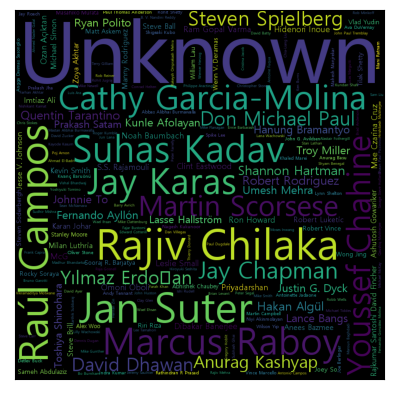

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

net_directors = list(netflix['director'].replace('-','Unknown'))
result = ', '.join(s for s in net_directors)
dir_list = result.split(sep=', ')
dir_list_c = Counter(dir_list)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(dir_list_c)
plt.xticks([])
plt.yticks([])
plt.imshow(gen)

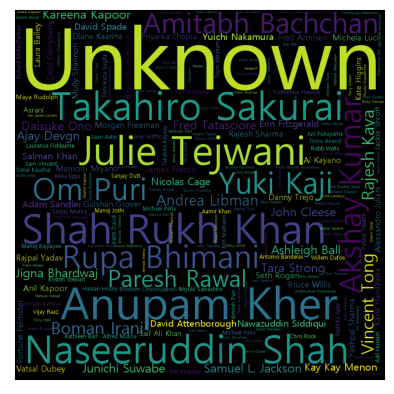

In [61]:
net_casts = list(netflix['cast'].replace('-','Unknown'))
result = ', '.join(s for s in net_casts)
cast_list = result.split(sep=', ')

cast_list_c = Counter(cast_list)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen_1 = wc.generate_from_frequencies(cast_list_c)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(gen_1)

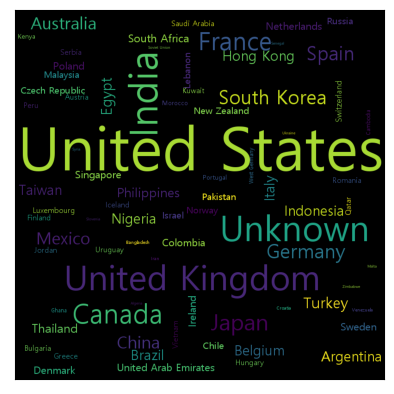

In [65]:
net_country = list(netflix['country'].replace('-','Unknown'))
result = ', '.join(s for s in net_country)
country = result.split(sep=', ')
country

country_c = Counter(country)

wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen_2 = wc.generate_from_frequencies(country_c)
plt.figure()
plt.xticks([])
plt.yticks([])
plt.imshow(gen_2)